# **PraUAS**

# Deteksi dan Klasifikasi Ranjau Pasif Berdasarkan Model Hibrida


## Pendahuluan

Deteksi ranjau yang terkubur di dalam tanah sangat penting dalam hal
keselamatan jiwa dan harta benda. Banyak metode berbeda telah digunakan
dalam hal ini; namun, belum mungkin untuk mencapai keberhasilan 100%.
Proses deteksi ranjau terdiri dari fase desain sensor, analisis data, dan
algoritma keputusan. Ketika publikasi sebelumnya diteliti, studi berikut muncul
ke permukaan.


## Data Undder standing


### Sumber Dataset

https://archive.ics.uci.edu/dataset/763/land+mines-1

Yilmaz, C., Kahraman, H. T., & Söyler, S. (2018).

###Tujuan


Dalam penelitian ini, digunakan suatu teknik untuk menentukan
luas ranjau darat dengan mengukur anomali medan magnet alami
Bumi. Prinsip utama dalam metode ini adalah menentukan
keberadaan anomali di lingkungan tempat penelitian dilakukan. Sifat
magnetik yang berbeda dari berbagai jenis material menjadi
penyebab terjadinya anomali.


### Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

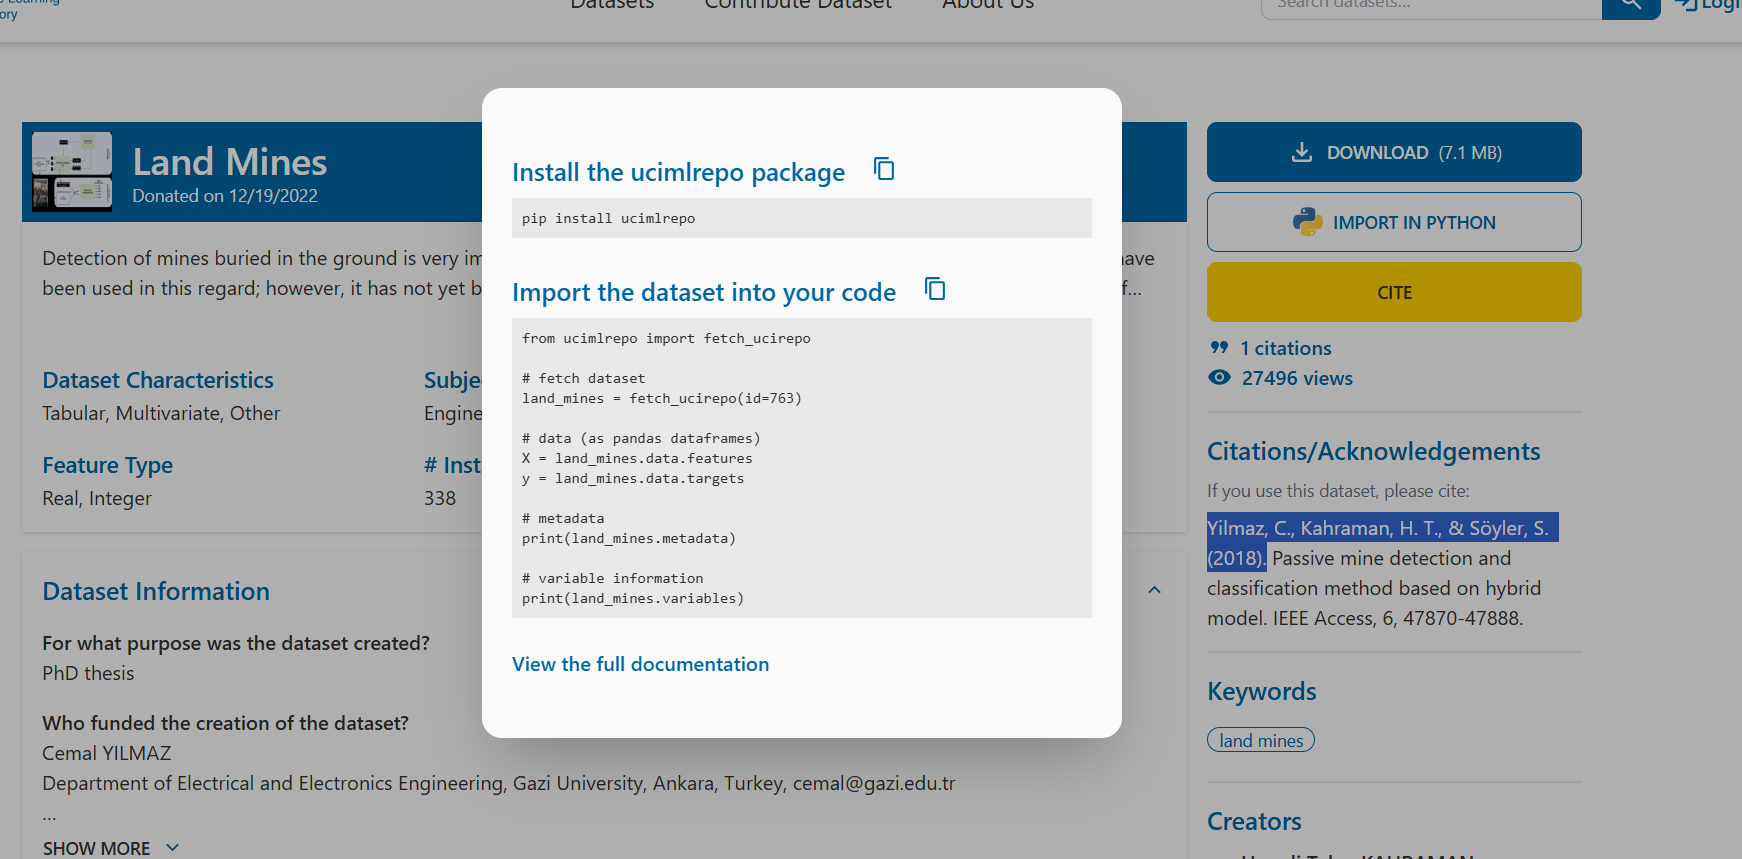

### Struktur Dataset

#### Fitur dan Tabel

In [80]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)


(338, 4)

In [81]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset


Index(['V', 'H', 'S', 'M'], dtype='object')

Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi.

Terdapat 4 fitur pada dataset ini


*   V = (voltage) Nilai tegangan keluaran sensor FLC karena distrosi magnetik.
*   H = (hight) Ketinggian sensor dari tanah
*   S = (soil type) Jenis tanah yang berbeda tergantung pada kelembaban.

Label adalah variabel dependen atau target yang ingin diprediksi oleh model machine learning. Label merupakan output yang dipelajari oleh model dari data.

Terdapat 1 field label dengan 5 tipe pada dataset ini:

*  Null di lambangkan dengan 1
*  Anti-Tank di lambangkan dengan 2
*  Anti-Personnel di lambangkan dengan 3
*  Booby Trapped Anti-Personnel di lambangkan dengan 4
*  M14 Anti-Personnel   di lambangkan dengan 5



In [82]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom


,0
V,float64
H,float64
S,float64
M,object


Lebih jelasnya:

- V (Numerik kontinu)
  
 Kanal vertikal dari sensor ranjau (amplitudo/pantulan sinyal vertikal)
  
  * 0v, 10,6v

- H (Numerik kontinu)

  Kanal horizontal dari sensor ranjau (data dari arah horizontal)

  * 0 cm, 20cm

- S (Numerik kontinu)

  Kanal sinyal gabungan / hasil transformasi spektral

  * Dry and Sandy
  * Dry and Humus
  * Dry and limy
  * Humid and Sandy
  * Humid and Humus
  * Humid and Limy

- M (Kategorikal nominal)
 *  1 = Null
 *  2 = Anti-Tank
 *  3 = Anti-Personnel
 *  4 = Booby Trapped Anti-Personnel
 *  5 = M14 Anti-Personnel  

  

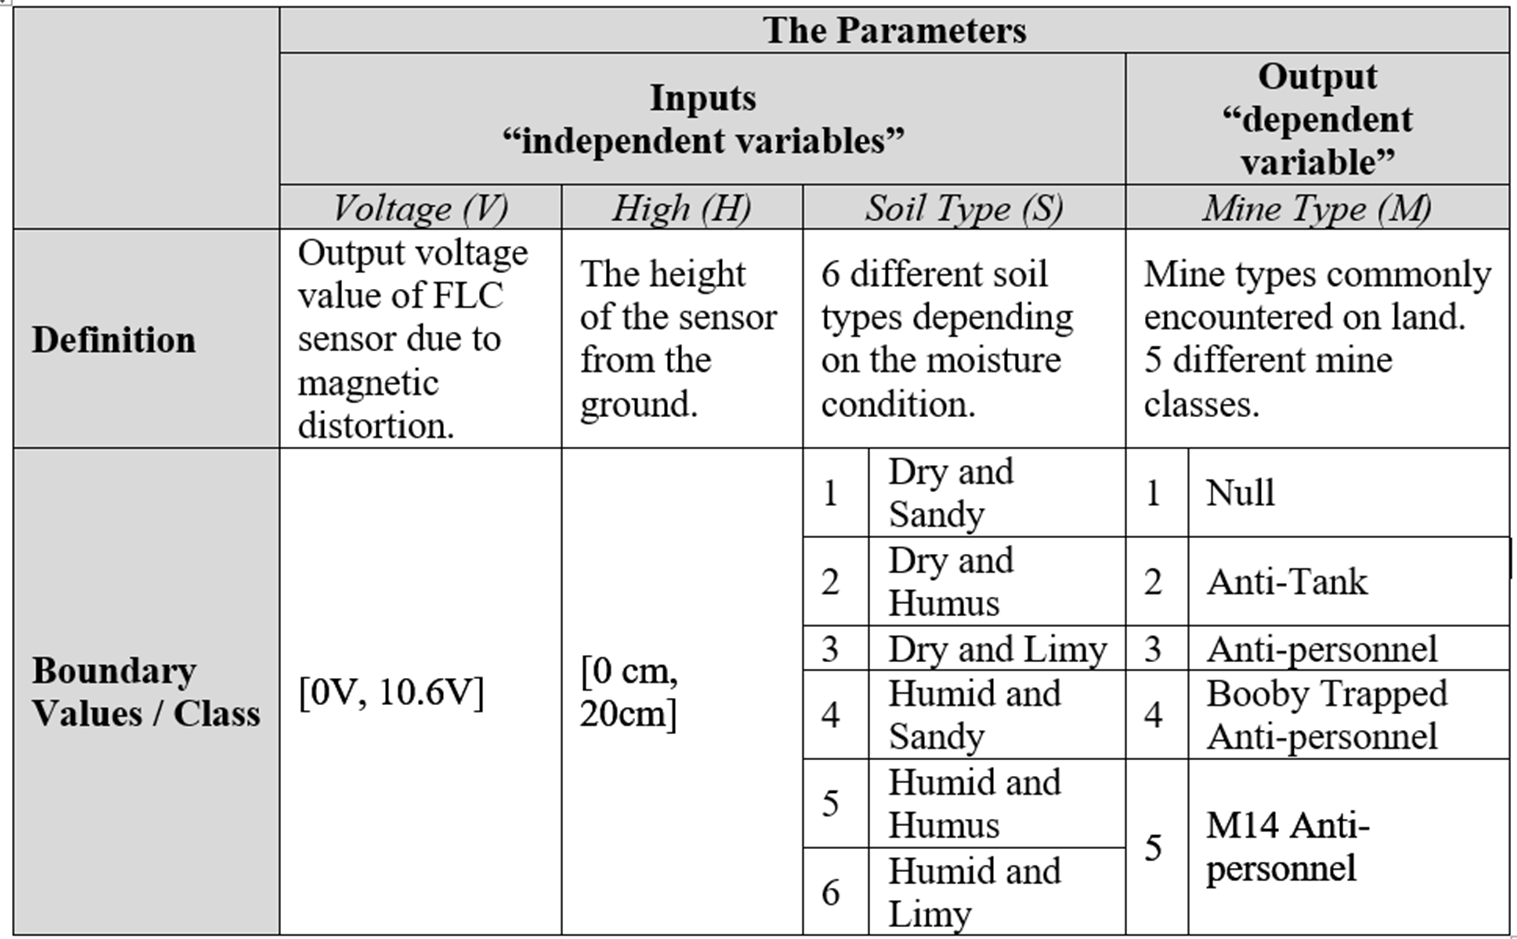

In [83]:
data.groupby('M').size() #untuk mengetahui jumlah masing-masing class


,0
M,
Anti-Personnel,66
Anti-Tank,70
Booby Trapped Anti-Personnel,66
M14 Anti-Personnel,65
Null,71


In [84]:
pip install ucimlrepo


In [85]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from IPython.display import display

In [86]:

# Ambil dataset Land Mines
land_mines = fetch_ucirepo(id=763)

# Ekstrak fitur dan target (sudah dalam bentuk pandas DataFrame)
X = land_mines.data.features
y = land_mines.data.targets

# Simpan fitur ke dalam file CSV
X.to_csv("land_mines.data.features.csv", index=False)

# Tampilkan informasi dan 5 baris pertama
print(X.info())
print(X.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB
None
          V         H    S
0  0.338157  0.000000  0.0
1  0.320241  0.181818  0.0
2  0.287009  0.272727  0.0
3  0.256284  0.454545  0.0
4  0.262840  0.545455  0.0


### Eksplorasi Data

#### Deteksi Missing Value

In [87]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Land Mines
land_mines = fetch_ucirepo(id=763)
X = land_mines.data.features
y = land_mines.data.targets

# Gabungkan fitur dan target
data = pd.concat([X, y], axis=1)

# --- Deteksi Missing Values ---

# 1. Tampilkan jumlah missing values per kolom
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# 2. Tampilkan total missing values di seluruh dataset
print("\nTotal missing values di seluruh dataset:")
print(data.isnull().sum().sum())

# 3. Tampilkan baris yang mengandung missing value (jika ada)
print("\nBaris dengan missing value:")
print(data[data.isnull().any(axis=1)])



Jumlah missing values per kolom:
V    0
H    0
S    0
M    0
dtype: int64

Total missing values di seluruh dataset:
0

Baris dengan missing value:
Empty DataFrame
Columns: [V, H, S, M]
Index: []


Tidak di temukan missing values dalam data


#### Deteksi Data Outliner

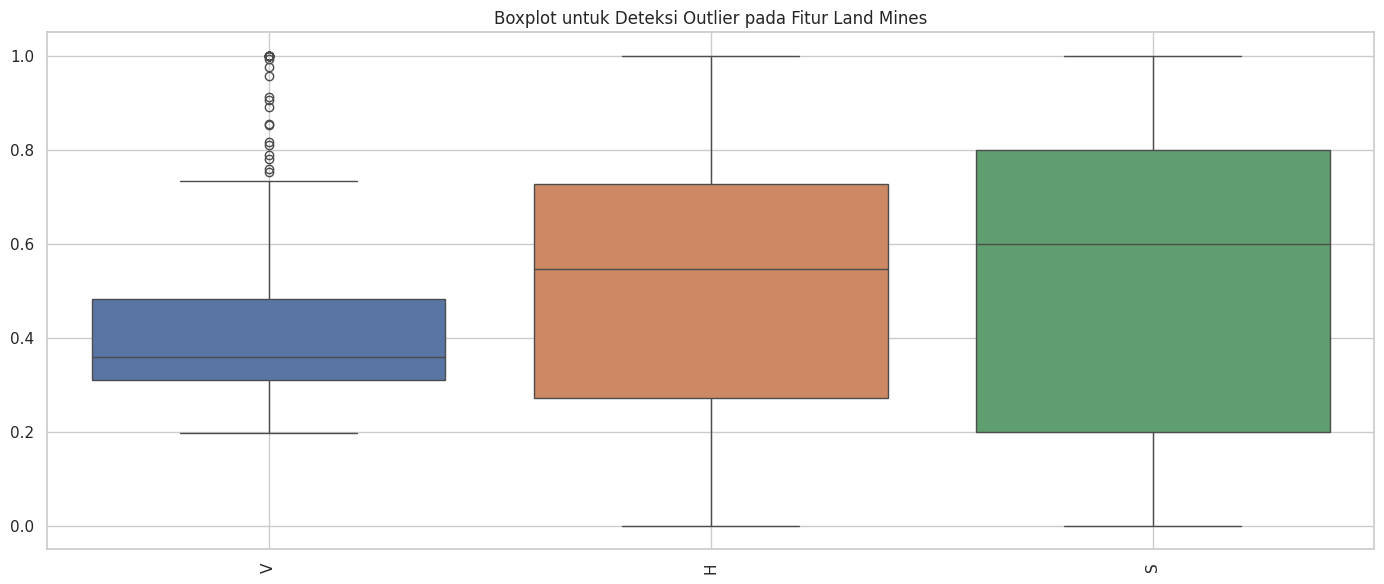

Jumlah outlier per kolom:
V    32
H     0
S     0
dtype: int64

 Ditemukan total 32 outlier di seluruh kolom.


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat boxplot semua kolom fitur
plt.figure(figsize=(14, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Land Mines")
plt.grid(True)
plt.tight_layout()
plt.show()

# Buat fungsi untuk menghitung outlier per kolom
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return pd.Series(outlier_counts)

# Hitung outlier
outlier_summary = detect_outliers_iqr(X)

# Tampilkan hasil
print("Jumlah outlier per kolom:")
print(outlier_summary)

# Cek apakah ada outlier sama sekali
if outlier_summary.sum() == 0:
    print("\n Tidak ditemukan outlier dalam dataset.")
else:
    print(f"\n Ditemukan total {outlier_summary.sum()} outlier di seluruh kolom.")


###  Visualisasi Data

In [89]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from IPython.display import display  # Hanya untuk Jupyter/Colab

# Ambil dataset Land Mines
land_mines = fetch_ucirepo(id=763)

# Ambil fitur dan target
X = land_mines.data.features
y = land_mines.data.targets

# Gabungkan fitur dan target
data = pd.concat([X, y], axis=1)

# Tampilkan data (hanya display saja)
display(data)


,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
5,0.240966,0.727273,0.0,1
6,0.254410,0.818182,0.0,1
7,0.234924,1.000000,0.0,1
8,0.353474,0.000000,0.6,1
9,0.335347,0.181818,0.6,1


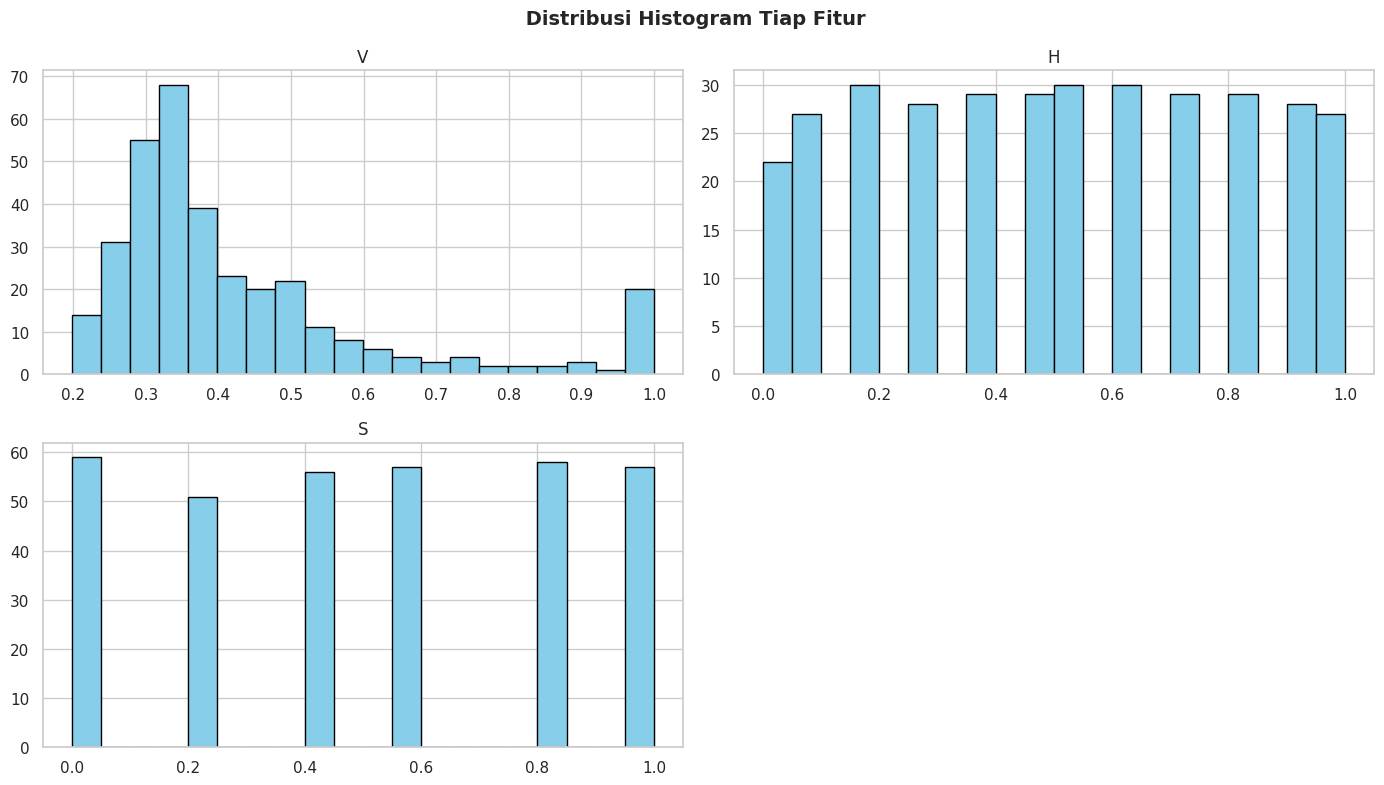

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema seaborn
sns.set(style="whitegrid")

# Buat histogram untuk semua fitur numerik
data_features = data.drop(columns=['M'])  # Kolom target 'M' dikeluarkan

# Histogram
data_features.hist(bins=20, figsize=(14, 8), color='skyblue', edgecolor='black')
plt.suptitle(" Distribusi Histogram Tiap Fitur", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Prosesing Data


### Transformasi Data

In [91]:
# Mapping label numerik di kolom 'M' ke deskripsi
label_mapping = {
    1: 'Null',
    2: 'Anti-Tank',
    3: 'Anti-Personnel',
    4: 'Booby Trapped Anti-Personnel',
    5: 'M14 Anti-Personnel'
}
data['M'] = data['M'].replace(label_mapping)

# Tampilkan 10 baris pertama
print("10 Baris Pertama:")
display(data.head(10))

# Tampilkan 10 baris terakhir
print("10 Baris Terakhir:")
display(data.tail(10))

10 Baris Pertama:


,V,H,S,M
0,0.338157,0.000000,0.0,Null
1,0.320241,0.181818,0.0,Null
2,0.287009,0.272727,0.0,Null
3,0.256284,0.454545,0.0,Null
4,0.262840,0.545455,0.0,Null
5,0.240966,0.727273,0.0,Null
6,0.254410,0.818182,0.0,Null
7,0.234924,1.000000,0.0,Null
8,0.353474,0.000000,0.6,Null
9,0.335347,0.181818,0.6,Null


10 Baris Terakhir:


,V,H,S,M
328,0.378157,0.545455,0.8,M14 Anti-Personnel
329,0.319939,0.818182,0.8,M14 Anti-Personnel
330,0.519637,0.090909,0.4,M14 Anti-Personnel
331,0.398791,0.363636,0.4,M14 Anti-Personnel
332,0.347432,0.636364,0.4,M14 Anti-Personnel
333,0.323262,0.909091,0.4,M14 Anti-Personnel
334,0.444108,0.181818,1.0,M14 Anti-Personnel
335,0.353474,0.454545,1.0,M14 Anti-Personnel
336,0.362537,0.727273,1.0,M14 Anti-Personnel
337,0.314199,1.000000,1.0,M14 Anti-Personnel


### Normalisasi Data

In [92]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
import pandas as pd

# Pisahkan fitur numerik (semua kolom kecuali 'M')
X_numeric = data.drop(columns=['M'])

# Inisialisasi scaler dan transformasi
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numeric)

# Ubah ke DataFrame kembali
X_normalized_df = pd.DataFrame(X_normalized, columns=X_numeric.columns)

# Gabungkan dengan label 'M' kembali
data_normalized = pd.concat([X_normalized_df, data['M'].reset_index(drop=True)], axis=1)


### Split Data

In [93]:
# Pisahkan fitur dan label
X = data_normalized.drop(columns=['M'])  # fitur
y = data_normalized['M']  # label target

# Encode label (jika masih berbentuk teks)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Tampilkan dimensi hasil split
print("Ukuran data:")
print(f"- X_train: {X_train.shape}")
print(f"- X_test : {X_test.shape}")
print(f"- y_train: {y_train.shape}")
print(f"- y_test : {y_test.shape}")

Ukuran data:
- X_train: (270, 3)
- X_test : (68, 3)
- y_train: (270,)
- y_test : (68,)


### Visualissasi

#### Data normalisasi

In [94]:

pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom

display(data_normalized)

,V,H,S,M
0,0.175033,0.000000,0.0,Null
1,0.152702,0.181818,0.0,Null
2,0.111279,0.272727,0.0,Null
3,0.072981,0.454545,0.0,Null
4,0.081152,0.545455,0.0,Null
5,0.053888,0.727273,0.0,Null
6,0.070646,0.818182,0.0,Null
7,0.046357,1.000000,0.0,Null
8,0.194125,0.000000,0.6,Null
9,0.171531,0.181818,0.6,Null


#### Isi Data Testing dan Traning

In [95]:
# Kembalikan label ke bentuk aslinya
y_train_named = le.inverse_transform(y_train)
y_test_named = le.inverse_transform(y_test)

# Gabungkan kembali label ke data fitur
train_combined = pd.concat([X_train, pd.Series(y_train_named, name='M')], axis=1)
test_combined = pd.concat([X_test, pd.Series(y_test_named, name='M')], axis=1)

# Tampilkan 5 baris pertama data training
print("5 Data Training (dengan label M):")
display(train_combined.head())

# Tampilkan 5 baris pertama data testing
print("5 Data Testing (dengan label M):")
display(test_combined.head())


5 Data Training (dengan label M):


,V,H,S,M
164,0.047260,0.545455,0.8,Anti-Tank
254,0.657315,0.454545,0.6,Anti-Personnel
143,0.212954,0.818182,0.0,Booby Trapped Anti-Personnel
137,0.135568,1.000000,1.0,Null
264,1.000000,0.090909,0.4,Null


5 Data Testing (dengan label M):


,V,H,S,M
251,0.484090,0.727273,0.0,NaN
30,0.156468,0.818182,0.8,Anti-Personnel
213,0.231783,0.454545,0.4,NaN
48,1.000000,0.090909,0.0,Anti-Tank
39,0.137639,1.000000,0.4,Null


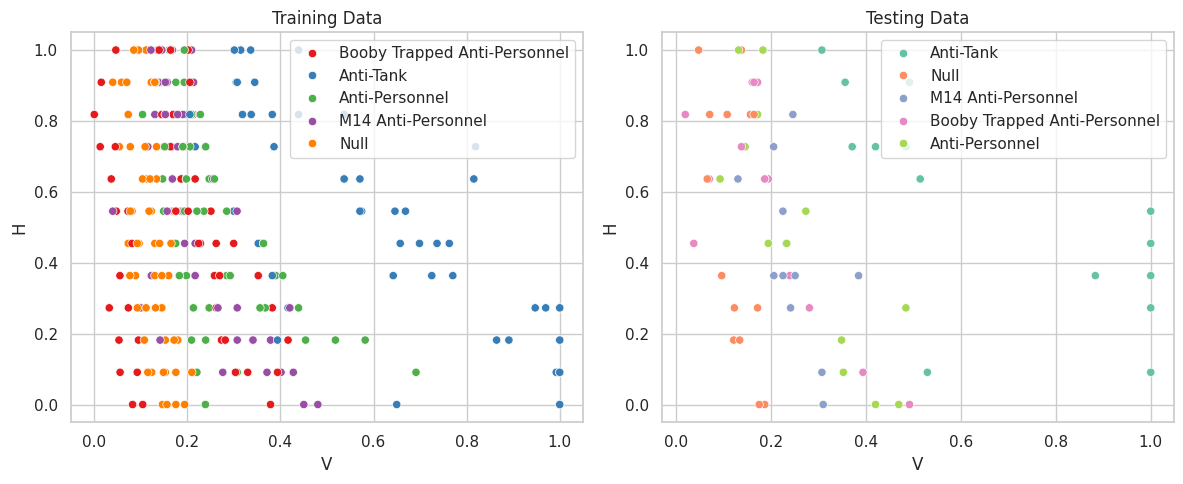

In [96]:
# Ambil 2 fitur pertama untuk visualisasi
feat1 = X_train.columns[0]
feat2 = X_train.columns[1]

# Gunakan label asli
y_train_named = le.inverse_transform(y_train)
y_test_named = le.inverse_transform(y_test)

# Plot data training
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train[feat1], y=X_train[feat2], hue=y_train_named, palette='Set1')
plt.title('Training Data')
plt.xlabel(feat1)
plt.ylabel(feat2)

# Plot data testing
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[feat1], y=X_test[feat2], hue=y_test_named, palette='Set2')
plt.title('Testing Data')
plt.xlabel(feat1)
plt.ylabel(feat2)

plt.tight_layout()
plt.show()


In [97]:
# Gabungkan kembali fitur dan label M (dalam bentuk nama asli)
data_final = pd.concat([X, pd.Series(le.inverse_transform(y_encoded), name='M')], axis=1)

# Simpan ke file CSV
data_final.to_csv("land_mines_normalized_labeled.csv", index=False)

print("Data berhasil disimpan sebagai 'land_mines_normalized_labeled.csv'")


Data berhasil disimpan sebagai 'land_mines_normalized_labeled.csv'


## Modeling

### Modelling Klasifikasi Dataset Ranjau Tanah menggunakan Decision Tree


Pemodelan Klasifikasi Jenis Ranjau Darat Menggunakan Decision Tree

**Tujuan Pemodelan**

Pemodelan ini bertujuan untuk **mengklasifikasikan jenis objek bawah tanah** (seperti ranjau, batu, fragmen logam, dll.) berdasarkan sejumlah fitur sinyal numerik yang dikumpulkan dari sensor deteksi ranjau.
Kategori yang digunakan dalam klasifikasi ini antara lain:

* Anti-Tank Mine
* Anti-Personnel Mine
* Metal Fragment
* Rock
* Background (dan label lainnya tergantung isi data)

---

**Pembagian Dataset: Data Latih dan Data Uji**

Langkah pertama dalam proses klasifikasi adalah membagi data menjadi dua bagian utama:

* **Data Latih (Training Set):** digunakan untuk melatih model
* **Data Uji (Testing Set):** digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya

> Untuk eksperimen ini digunakan **rasio 80:20**, di mana:
>
> * 80% digunakan untuk pelatihan
> * 20% digunakan untuk pengujian

---

**Pra-Pemrosesan Data**

Sebelum data digunakan dalam model klasifikasi, beberapa tahapan pra-pemrosesan dilakukan:

1. **Normalisasi Data:**
   Semua fitur numerik dinormalisasi menggunakan Min-Max Scaling untuk mengubah skala data ke rentang 0 hingga 1.
   *(Meskipun Decision Tree tidak wajib dinormalisasi, langkah ini dilakukan untuk keseragaman antar model)*

2. **Label Encoding:**
   Kolom `M` (jenis ranjau) yang awalnya berupa angka (1, 2, 3, ...) dikonversi ke label kategori seperti:

   * `2 → Anti-Tank`
   * `3 → Anti-Personnel`
   * dst.
     Kemudian, label tersebut diubah ke bentuk numerik menggunakan **LabelEncoder**.

---

**Pelatihan Model Decision Tree**

Model klasifikasi yang digunakan adalah **Decision Tree Classifier**, yaitu metode supervised learning berbasis pohon keputusan.

Setiap **node pada pohon** akan memecah data berdasarkan fitur yang **paling mengurangi impurity** (ketidakteraturan data), diukur dengan:

* **Kriteria**: `gini`
* **Kedalaman maksimum (max\_depth)**: `5` (untuk mencegah overfitting)

Struktur pohon akan terbentuk dengan:

* Akar pohon berdasarkan fitur paling signifikan
* Cabang berdasarkan pengujian fitur
* Daun menyatakan hasil klasifikasi akhir

---

**Evaluasi Model**

Setelah model dilatih, kinerjanya dievaluasi menggunakan:

* **Akurasi**: Persentase data uji yang diprediksi dengan benar
* **Classification Report**: Menampilkan precision, recall, dan F1-score untuk setiap kelas ranjau
* **Confusion Matrix (opsional)**: Memvisualisasikan kesalahan klasifikasi antar kelas

Model juga divisualisasikan dalam bentuk **struktur pohon keputusan**, untuk memahami:

* Fitur mana yang paling berpengaruh
* Bagaimana proses klasifikasi terjadi
* Urutan pemisahan fitur

---

**Prediksi Jenis Ranjau**

Setelah pelatihan dan evaluasi selesai, model siap digunakan untuk:

* **Memprediksi jenis ranjau** di lokasi baru berdasarkan data sensor
* **Memahami pola sinyal** apa yang paling mengindikasikan adanya objek berbahaya (seperti anti-tank atau fragmen logam)

---

**Kesimpulan**

Model **Decision Tree** cocok digunakan dalam klasifikasi ranjau darat karena:

* Mampu menangani fitur numerik **tanpa transformasi yang rumit**
* Dapat menghasilkan model yang **mudah diinterpretasikan secara visual**
* Cepat, fleksibel, dan efektif untuk dataset berukuran sedang

Model ini sangat berguna untuk **membantu tugas militer, penyelamatan, atau robot otonom** dalam mendeteksi ranjau secara otomatis tanpa perlu inspeksi manual yang berisiko.

---

Kalau kamu ingin saya bantu buatkan **versi visualisasi confusion matrix** atau **bar chart perbandingan model**, tinggal beri tahu saja ya!


 Akurasi: 42.65 %

📄 === Classification Report ===
                              precision    recall  f1-score   support

              Anti-Personnel       0.24      0.38      0.29        13
                   Anti-Tank       1.00      0.71      0.83        14
Booby Trapped Anti-Personnel       0.38      0.23      0.29        13
          M14 Anti-Personnel       0.07      0.08      0.07        13
                        Null       0.67      0.67      0.67        15

                    accuracy                           0.43        68
                   macro avg       0.47      0.41      0.43        68
                weighted avg       0.48      0.43      0.44        68



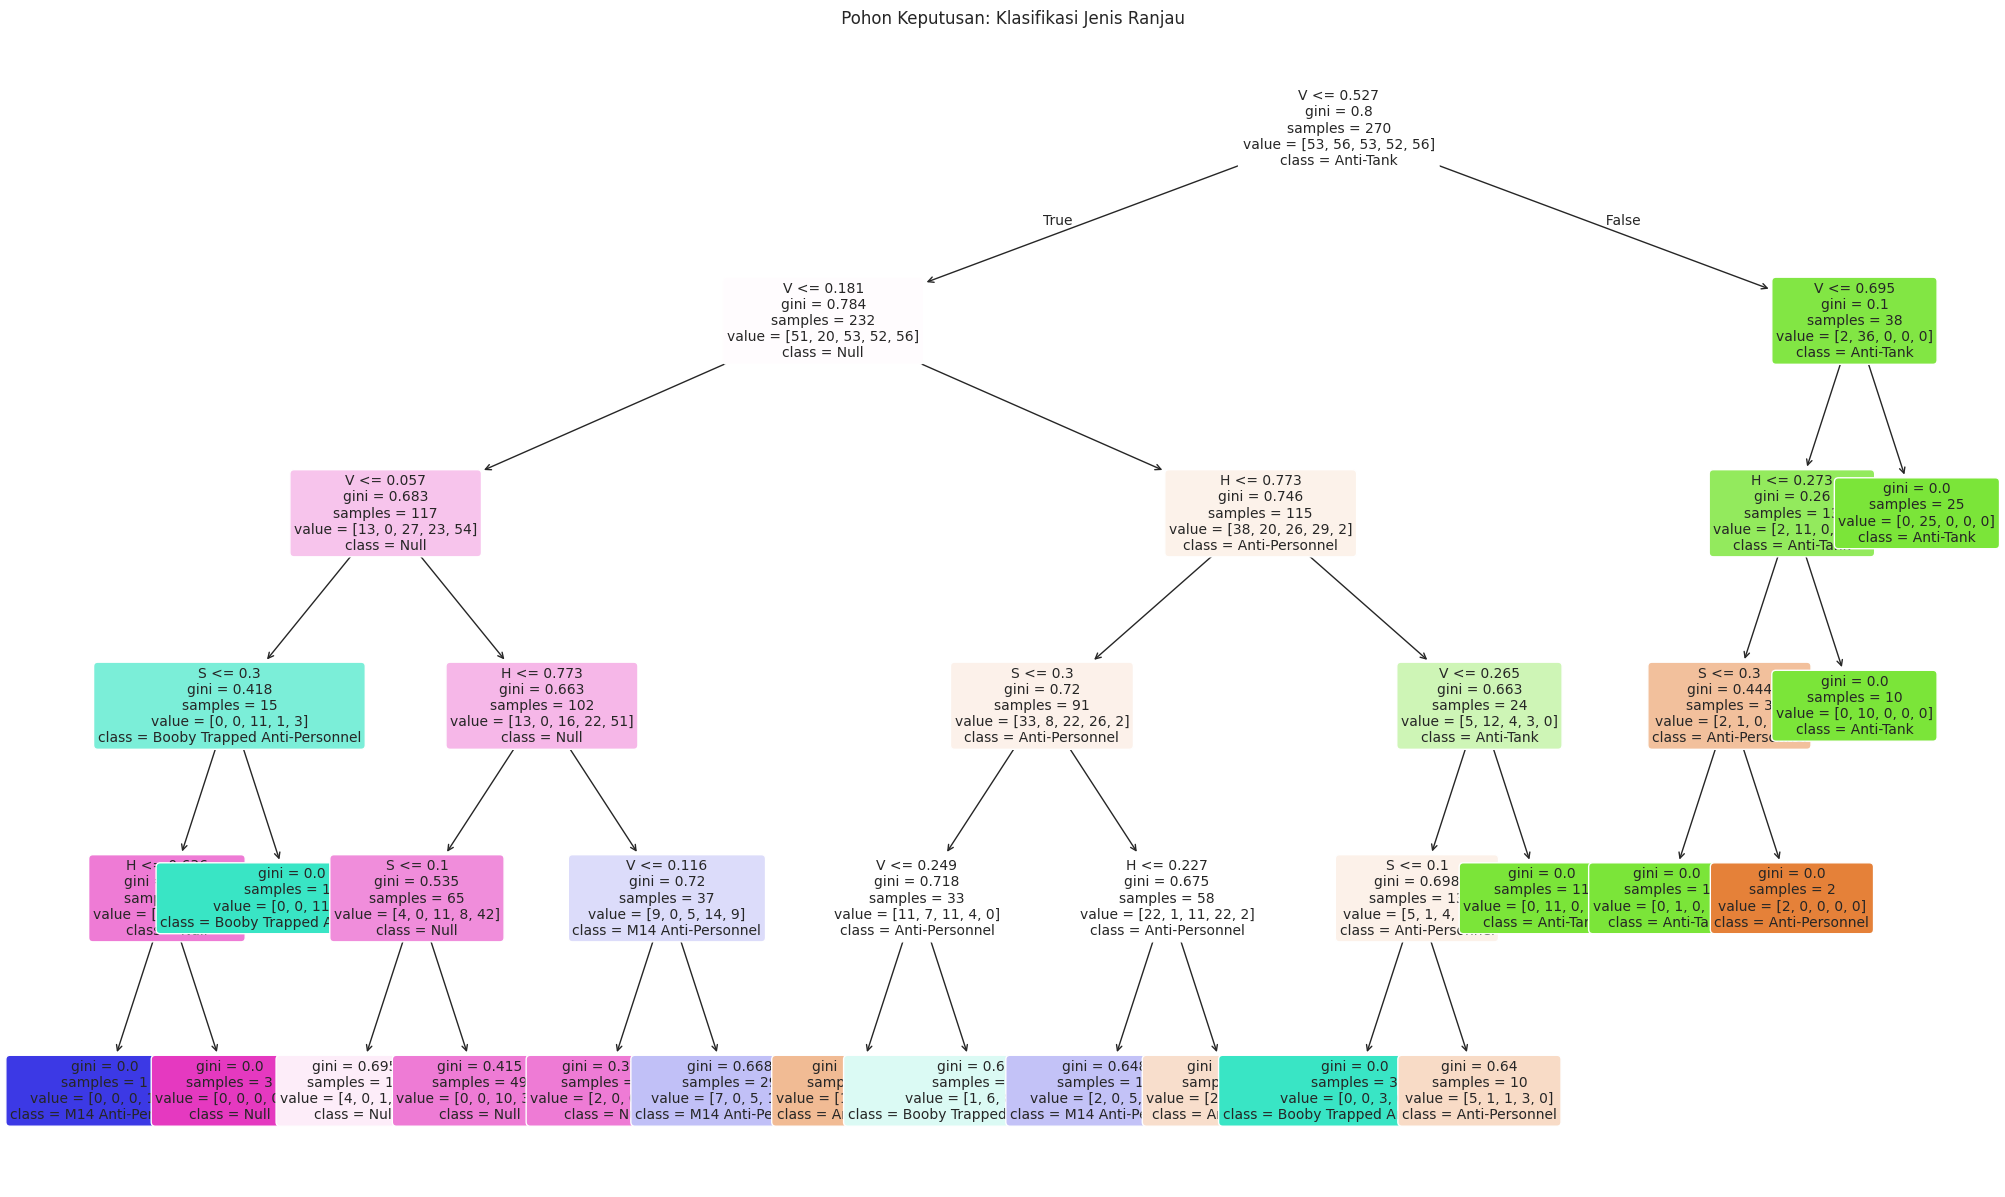

In [98]:
# === 2. Baca Data ===
data = pd.read_csv("land_mines_normalized_labeled.csv")

# === 7. Evaluasi Model ===
y_pred = clf.predict(X_test)
print(" Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\n📄 === Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# === 8. Visualisasi Struktur Pohon ===
plt.figure(figsize=(25, 15))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(" Pohon Keputusan: Klasifikasi Jenis Ranjau")
plt.show()


### Modelling Klasifikasi Dataset Ranjau Darat menggunakan Gaussian Naive Bayes



 Tujuan Pemodelan

Pada pemodelan kali ini, tujuan utamanya adalah untuk **menentukan jenis objek bawah tanah** (seperti **anti-tank**, **anti-personnel**, **fragmen logam**, atau **batu**) berdasarkan data fitur sinyal numerik hasil pengukuran oleh sensor deteksi ranjau.

Untuk membangun model klasifikasi ini, digunakan metode **Gaussian Naive Bayes (GNB)**, salah satu teknik machine learning berbasis **probabilistik** yang mengasumsikan distribusi normal (Gaussian) pada setiap fitur.

---
1.Pembagian Dataset Menjadi Data Latih dan Data Uji

Langkah awal dalam proses modeling adalah membagi data menjadi dua bagian:

* **Data Latih (Training Set):** digunakan untuk membangun model.
* **Data Uji (Testing Set):** digunakan untuk mengevaluasi kinerja model terhadap data baru yang belum pernah dilihat.

Dalam modeling ini, digunakan **rasio pembagian 80:20**, yang berarti:

* 80% data digunakan untuk pelatihan
* 20% data digunakan untuk pengujian

Pembagian ini dilakukan secara acak namun konsisten dengan menyetel nilai `random_state`.

---

2. Menghitung Probabilitas Awal (Prior Probability)

Setelah data dibagi, langkah selanjutnya adalah menghitung **probabilitas awal (prior)** untuk setiap **kelas jenis ranjau**.

Caranya:

* Hitung jumlah data latih untuk setiap kelas `M` (misalnya: Anti-Tank, Rock, Fragment, dll.)
* Bagi dengan total data latih

Contoh:
Jika dari 400 data latih terdapat 100 data dengan label "Anti-Tank", maka prior-nya:

```
P(Anti-Tank) = 100 / 400 = 0.25
```

Nilai prior ini mencerminkan **seberapa besar kemungkinan sebuah objek termasuk dalam kelas tersebut sebelum mempertimbangkan fitur-fitur sinyal**.

---

 3.Menghitung Rata-rata dan Standar Deviasi Tiap Fitur

Untuk setiap kelas `M`, dihitung:

* **Rata-rata (mean)** dari setiap fitur numerik (`V`, `H`, `S`, `X1`, ..., `X12`)
* **Standar deviasi (standard deviation)** dari fitur-fitur tersebut

Mengapa ini penting?
Karena algoritma GaussianNB mengasumsikan bahwa distribusi dari setiap fitur **mengikuti distribusi normal (Gaussian)**.

---

4.  Menghitung Distribusi Gaussian

Untuk setiap fitur pada tiap kelas, dihitung probabilitas munculnya nilai fitur tersebut menggunakan **rumus distribusi Gaussian** berikut:

$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Keterangan:

* $x$: nilai fitur input
* $\mu$: rata-rata fitur di kelas tertentu
* $\sigma$: standar deviasi fitur di kelas tertentu

Langkah ini dilakukan untuk setiap fitur dan setiap kelas `M`.

---

5.  Menghitung Probabilitas Posterior

Setelah memperoleh probabilitas Gaussian dari masing-masing fitur, digunakan rumus probabilitas **posterior**:

$$
\text{Posterior} = P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

Artinya:

* Setiap fitur memiliki probabilitas terhadap suatu kelas
* Semua probabilitas dikalikan dengan prior dari kelas tersebut

Kelas yang memiliki nilai **posterior terbesar** akan dipilih sebagai **hasil klasifikasi**.

---

6. Menentukan Prediksi Kelas

Setelah semua nilai posterior dihitung untuk tiap kelas `M`, langkah terakhir adalah:

> **Memilih kelas dengan probabilitas posterior tertinggi**

Kelas tersebut menjadi **hasil prediksi** model terhadap jenis objek bawah tanah berdasarkan fitur-fitur sinyal input.

---

Evaluasi Model

Model diuji pada data uji untuk melihat performanya. Metode evaluasi yang digunakan antara lain:

* **Akurasi**: Persentase prediksi yang benar
* **Classification Report**: Precision, Recall, dan F1-score per kelas
* **Confusion Matrix**: Tabel distribusi kesalahan prediksi antar kelas

Visualisasi Confusion Matrix membantu memahami bagaimana model membedakan antar kelas, misalnya apakah model sering salah memprediksi "Rock" sebagai "Fragment".

---

 Kesimpulan

Model **Gaussian Naive Bayes** sangat cocok digunakan dalam kasus klasifikasi jenis ranjau karena:

* **Cepat dan efisien**, cocok untuk data real-time
* **Sederhana dan mudah diinterpretasi**
* **Dapat bekerja dengan baik** meskipun fitur-fitur tidak terlalu kompleks

Model ini dapat digunakan dalam sistem deteksi otomatis ranjau untuk mempercepat proses identifikasi objek bawah tanah berdasarkan pola sinyal sensor yang terbaca.

---

Kalau kamu ingin saya bantu membuat visualisasi tambahan (seperti bar chart akurasi per kelas atau perbandingan model lain), tinggal bilang saja ya!


✅ Akurasi Gaussian Naive Bayes: 42.65 %

📄 === Classification Report ===
                              precision    recall  f1-score   support

              Anti-Personnel       0.24      0.38      0.29        13
                   Anti-Tank       1.00      0.71      0.83        14
Booby Trapped Anti-Personnel       0.38      0.23      0.29        13
          M14 Anti-Personnel       0.07      0.08      0.07        13
                        Null       0.67      0.67      0.67        15

                    accuracy                           0.43        68
                   macro avg       0.47      0.41      0.43        68
                weighted avg       0.48      0.43      0.44        68



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


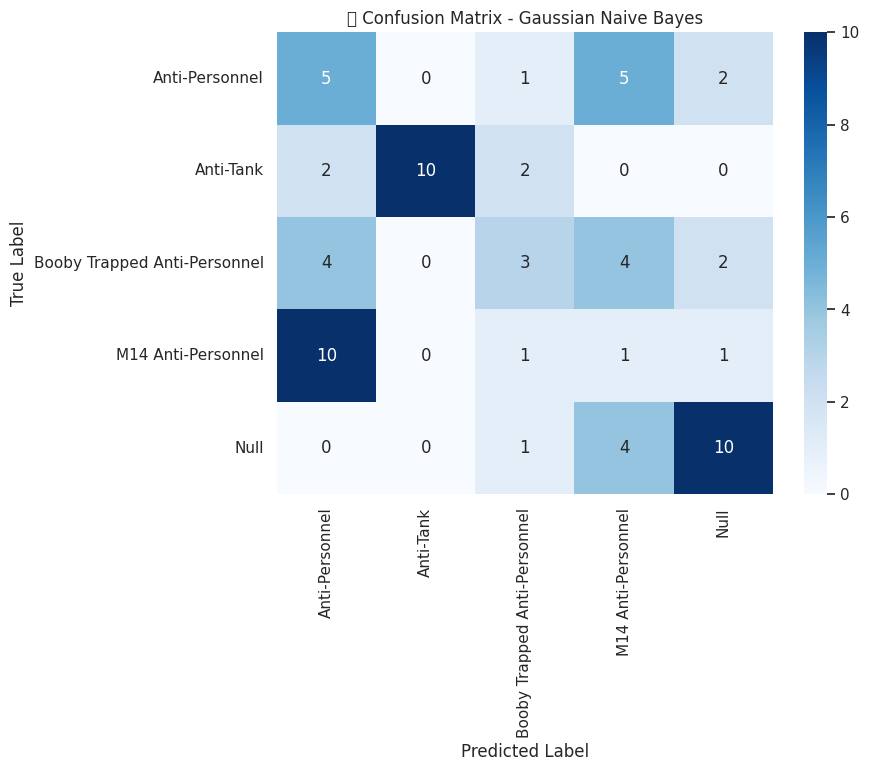

In [99]:
# === 8. Hasil Evaluasi ===
accuracy_nb = accuracy_score(y_test, y_pred)  # Simpan akurasi Naive Bayes
print(f"✅ Akurasi Gaussian Naive Bayes: {round(accuracy_nb * 100, 2)} %")

print("\n📄 === Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# === 9. Confusion Matrix Visual ===
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("📊 Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Modelling Klasifikasi Dataset Ranjau Darat menggunakan K-Nearest Neighbor (K-NN)

---



 Tujuan Pemodelan

Model **K-Nearest Neighbors (KNN)** digunakan untuk mengklasifikasikan jenis objek bawah tanah (misalnya: **Anti-Tank**, **Rock**, **Fragment**, dan lainnya) berdasarkan sejumlah **fitur sinyal** hasil pembacaan sensor (`V`, `H`, `S`, `X1–X12`).

KNN merupakan metode **instance-based learning**, di mana prediksi kelas dilakukan dengan melihat **k tetangga terdekat** dari data uji di ruang fitur.

---
**1. Pembagian Dataset: Data Latih dan Data Uji**

Dataset dibagi menjadi:

* **Data Latih (Training Set):** digunakan sebagai referensi (tetangga)
* **Data Uji (Testing Set):** digunakan untuk mengevaluasi performa model

> Dalam modeling ini digunakan rasio umum yaitu **80% data latih dan 20% data uji**.

Pembagian ini penting untuk memastikan bahwa evaluasi dilakukan terhadap data yang **belum pernah dilihat** oleh model.

---

**2. Pra-Pemrosesan Data**

Agar KNN bekerja secara optimal, dilakukan beberapa tahap pra-pemrosesan:

* **Normalisasi Data**
  Karena KNN menggunakan **jarak Euclidean**, penting agar seluruh fitur numerik memiliki skala yang sama.
  Oleh karena itu, dilakukan normalisasi menggunakan **Min-Max Scaling** agar seluruh fitur berada dalam rentang \[0, 1].

* **Encoding Label**
  Kolom `M` yang berisi label jenis objek dikodekan menjadi angka menggunakan `LabelEncoder`.

> Tidak seperti dataset abalone yang punya fitur kategorikal seperti `Sex`, dataset ranjau ini **sepenuhnya numerik** pada fitur-fiturnya, sehingga tidak perlu encoding tambahan untuk fitur.

---

**3. Konsep Kerja KNN**

Berikut adalah alur kerja KNN dalam klasifikasi jenis ranjau:

1. Hitung jarak (biasanya **Euclidean**) antara data uji dan seluruh data latih.
2. Ambil **k tetangga terdekat** berdasarkan jarak tersebut.
3. Lakukan **voting mayoritas** berdasarkan label dari tetangga tersebut.
4. Label dengan jumlah terbanyak akan menjadi **prediksi akhir**.

Contoh:
Jika `k = 7`, dan 4 dari 7 tetangga memiliki label “Anti-Tank”, maka prediksi model adalah “Anti-Tank”.

---

**4. Evaluasi Model**

Model diuji menggunakan data uji untuk mengevaluasi performa klasifikasinya. Beberapa metrik yang digunakan:

* **Akurasi:**
  Persentase prediksi yang benar terhadap total data uji.

* **Classification Report:**
  Memberikan metrik:

  * **Precision** (akurasi untuk kelas tertentu)
  * **Recall** (kemampuan mendeteksi kelas tertentu)
  * **F1-score** (rata-rata harmonik dari precision dan recall)

* **Confusion Matrix:**
  Tabel visual yang memperlihatkan seberapa banyak prediksi model sesuai atau tidak sesuai dengan label sebenarnya.

> Selain itu, eksperimen dilakukan dengan mencoba beberapa nilai **k** (misalnya 3, 5, 7, dst.) untuk mencari nilai **k terbaik** yang memberikan akurasi maksimal.

---

 **Kesimpulan**

Model **K-Nearest Neighbors (KNN)** terbukti efektif untuk melakukan klasifikasi jenis ranjau darat berdasarkan sinyal numerik.

Keunggulan:

* **Sederhana dan mudah diimplementasikan**
* **Tidak memerlukan pelatihan model yang kompleks**
* **Hasil prediksi tergantung langsung pada kualitas data latih**

Namun:

* KNN **sensitif terhadap skala fitur** → perlu normalisasi
* Kinerja dapat menurun jika terdapat terlalu banyak fitur tidak relevan (curse of dimensionality)

Dengan data sensor yang telah dinormalisasi, KNN bisa menjadi **metode klasifikasi cepat dan andal** untuk mendukung sistem deteksi ranjau otomatis berbasis sinyal.

---

Jika kamu ingin dibuatkan **tabel perbandingan model** (misalnya Naive Bayes vs KNN vs Decision Tree), saya siap bantu juga!


 Akurasi K-Nearest Neighbor: 42.65 %

📄 === Classification Report ===
                              precision    recall  f1-score   support

              Anti-Personnel       0.24      0.38      0.29        13
                   Anti-Tank       1.00      0.71      0.83        14
Booby Trapped Anti-Personnel       0.38      0.23      0.29        13
          M14 Anti-Personnel       0.07      0.08      0.07        13
                        Null       0.67      0.67      0.67        15

                    accuracy                           0.43        68
                   macro avg       0.47      0.41      0.43        68
                weighted avg       0.48      0.43      0.44        68



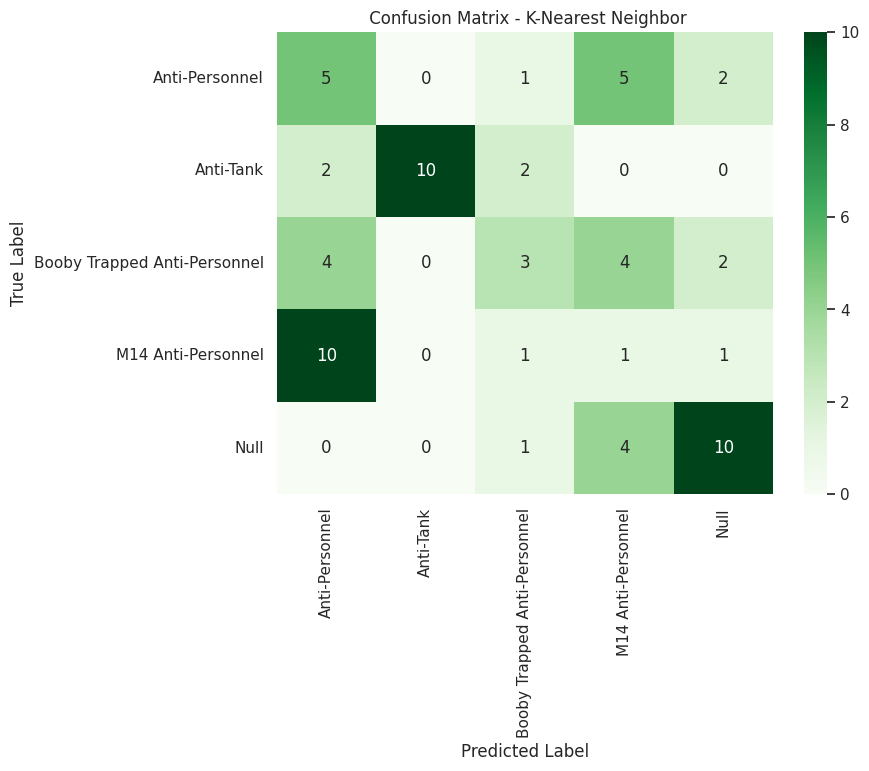

In [100]:

# === 8. Hasil evaluasi
accuracy_knn = accuracy_score(y_test, y_pred)
print(f" Akurasi K-Nearest Neighbor: {round(accuracy_knn * 100, 2)} %")

print("\n📄 === Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# === 9. Confusion Matrix Visual
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(" Confusion Matrix - K-Nearest Neighbor")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Evaluasi Data

In [101]:
print("Akurasi Model:")
print(f"Decision Tree      : {round(accuracy_dt * 100, 2)} %")
print(f"K-Nearest Neighbor : {round(accuracy_knn * 100, 2)} %")
print(f"Naive Bayes        : {round(accuracy_nb * 100, 2)} %")


Akurasi Model:
Decision Tree      : 51.47 %
K-Nearest Neighbor : 42.65 %
Naive Bayes        : 42.65 %


Dari ketiga model diatas dapat disimpulkan bahwa Decision Tree memiliki akurasi tertinggi yaitu 51.47%.